In [526]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Covid Dataset Germany

In [527]:
import os
os.getcwd()

'C:\\Users\\Asus'

In [528]:
df = pd.read_csv('Downloads/covid_de.csv')

In [529]:
df.head()

,state,county,age_group,gender,date,cases,deaths,recovered
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-27,1,0,1
1,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-28,1,0,1
2,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-04-03,1,0,1
3,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-10-18,1,0,1
4,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-10-22,1,0,1


In [530]:
df.shape

(2890909, 8)

The dataset has 2,890,909 rows and 8 columns

In [531]:
df.columns

Index(['state', 'county', 'age_group', 'gender', 'date', 'cases', 'deaths',
       'recovered'],
      dtype='object')

Here’s a quick explanation of each column in your Germany COVID dataset:

state: The federal state in Germany where the data was recorded.

county: The specific county or district within the state.

age_group: The age bracket of individuals (e.g., 0-19, 20-39, etc.).

gender: The gender of individuals (e.g., male, female, or other).

date: The date when the data was recorded or reported.

cases: The number of confirmed COVID-19 cases on that date.

deaths: The number of deaths due to COVID-19 recorded on that date.

recovered: The number of individuals who recovered from COVID-19 by that date.

In [532]:
df.dtypes

state        object
county       object
age_group    object
gender       object
date         object
cases         int64
deaths        int64
recovered     int64
dtype: object

Converting col 'Date' to Datetime datatype and 'Age-group' to category

In [533]:

df['date'] = pd.to_datetime(df['date'])
#df['age_group'] = df['age_group'].astype('category')

The states of Germany

There are 16 states in the dataset and 411 counties

In [534]:
df['state'].unique()

array(['Baden-Wuerttemberg', 'Bayern', 'Berlin', 'Brandenburg', 'Bremen',
       'Hamburg', 'Hessen', 'Mecklenburg-Vorpommern', 'Niedersachsen',
       'Nordrhein-Westfalen', 'Rheinland-Pfalz', 'Saarland', 'Sachsen',
       'Sachsen-Anhalt', 'Schleswig-Holstein', 'Thueringen'], dtype=object)

In [535]:
df['state'].nunique()

16

In [536]:
df['county'].nunique()

411

In [537]:
df['age_group'].unique()

array(['00-04', '05-14', '15-34', '35-59', '60-79', '80-99', nan],
      dtype=object)

Checking for null values

In [538]:
df.isnull().sum()

state             0
county            0
age_group     13876
gender       125625
date              0
cases             0
deaths            0
recovered         0
dtype: int64

Age_group and Gender has few null values which we shall convert to 0

In [539]:
df = df.fillna(0)

Checking for duplicated rows

In [540]:
df.duplicated().sum()

0

In [541]:
df.describe()

,cases,deaths,recovered
count,2.890909e+06,2.890909e+06,2.890909e+06
mean,1.307880e+01,5.742692e-02,1.294523e+01
std,2.965920e+01,3.195485e-01,2.967817e+01
min,0.000000e+00,0.000000e+00,-1.000000e+00
25%,2.000000e+00,0.000000e+00,1.000000e+00
50%,4.000000e+00,0.000000e+00,4.000000e+00
75%,1.200000e+01,0.000000e+00,1.200000e+01
max,2.156000e+03,2.100000e+01,2.156000e+03


## Univariate analysis

### Age-Group

In [542]:
df['age_group'] = df['age_group'].astype('category')
age_group_counts =df['age_group'].value_counts().reset_index()
age_group_counts1 = age_group_counts[age_group_counts['index'] != 0] 

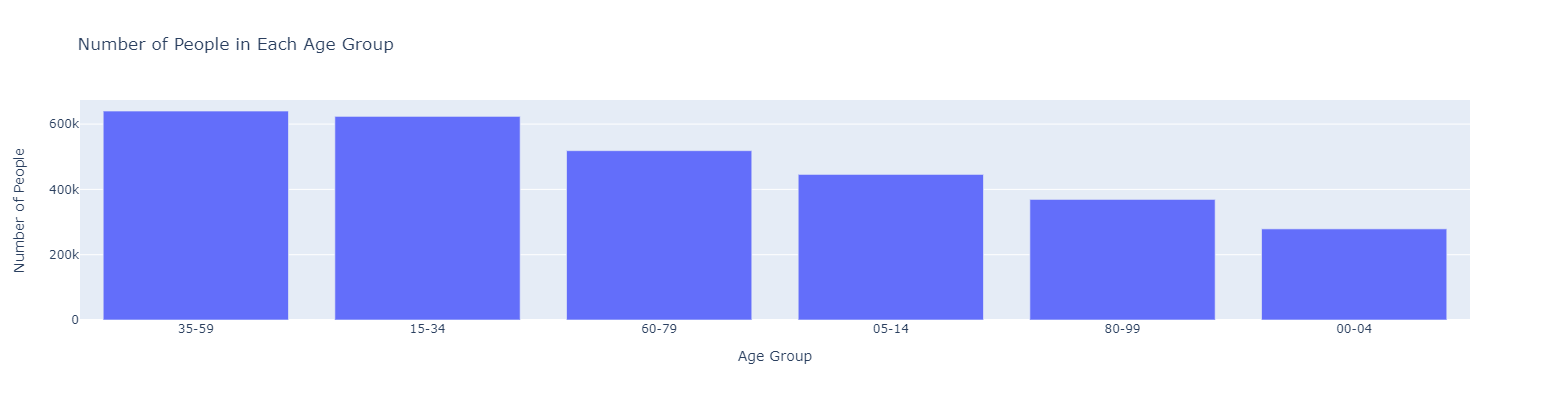

In [543]:
fig = px.bar(
    age_group_counts1,
    x='index',  
    y='age_group',  
    title='Number of People in Each Age Group'
)

fig.update_layout(
    width=600,  
    height=400, 
    xaxis_title="Age Group",
    yaxis_title="Number of People",
    
)
fig.update_xaxes(type='category')
fig.show()

### Total Cases - 37,809,624 accross Germany

In [544]:
df['cases'].sum()

37809624

### Number of people died = 166016

In [545]:
df['deaths'].sum()

166016

### Number of people recovered = 37,423,486

In [546]:
df['recovered'].sum()

37423486

### Number of people we dont know if died or recovered, perhaps there is no data = 220122

In [547]:
df['cases'].sum() - (df['recovered'].sum() + df['deaths'].sum())

220122

### Time Frame of Dataset

In [548]:
start_date = df['date'].min()
end_date = df['date'].max()

time_span = end_date - start_date
days = time_span.days
years = days / 365

print(f"The time frame of the data is from {start_date.date()} to {end_date.date()}.")
print(f"The span is {days} days, or approximately {years:.2f} years.")

The time frame of the data is from 2020-01-02 to 2023-02-02.
The span is 1127 days, or approximately 3.09 years.


### Bivariate and Multivariate Analysis

#### Cases and Deaths by Age group

In [549]:
df.columns

Index(['state', 'county', 'age_group', 'gender', 'date', 'cases', 'deaths',
       'recovered'],
      dtype='object')

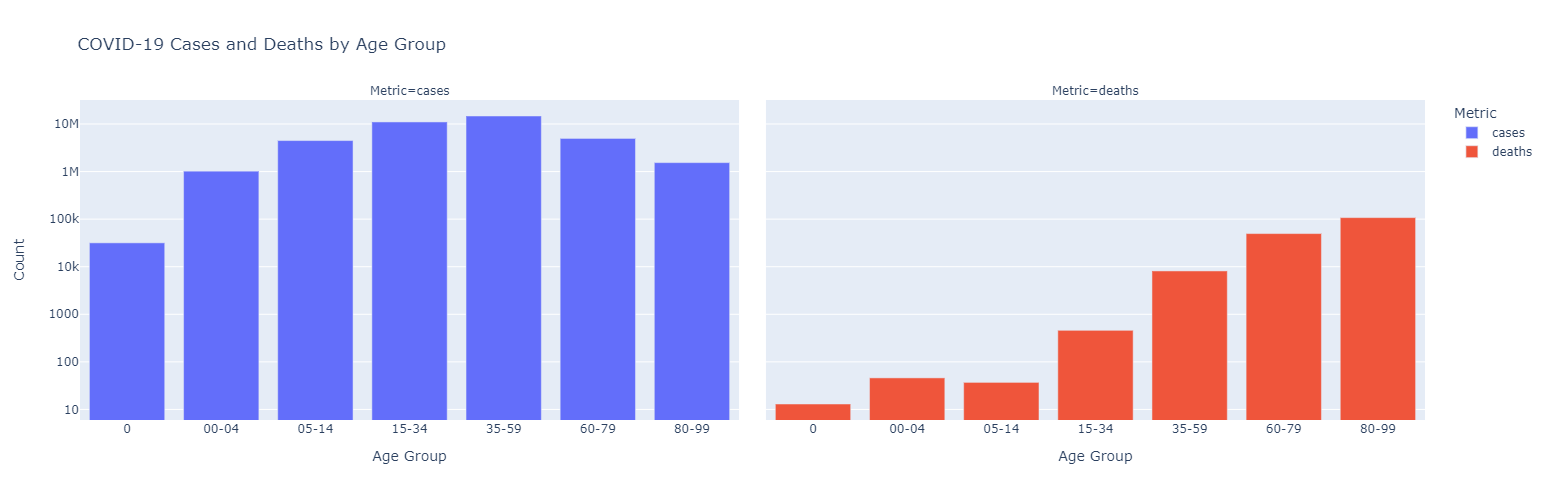

In [550]:
df_grouped = df.groupby('age_group')[['cases', 'deaths']].sum().reset_index()

df_melted = df_grouped.melt(id_vars='age_group', value_vars=['cases', 'deaths'], 
                            var_name='Metric', value_name='Count')

fig = px.bar(
    df_melted,
    x='age_group',
    y='Count',
    color='Metric',
    title='COVID-19 Cases and Deaths by Age Group ',
    labels={'age_group': 'Age Group', 'Count': 'Count', 'Metric': 'Metric'},
    log_y=True,
    barmode='stack', 
    facet_col='Metric', 
    facet_col_wrap=2, 
    width=1000,
    height=500
)


fig.show()

### Cases and Deaths by State in a Map

In [551]:
cd = df.groupby('state')[['cases','deaths']].sum().reset_index()

In [552]:
state_coords = {
    'Baden-Wuerttemberg': (48.6616, 9.3501),
    'Bayern': (48.7904, 11.4979),
    'Berlin': (52.5200, 13.4050),
    'Brandenburg': (52.4125, 12.5316),
    'Bremen': (53.0793, 8.8017),
    'Hamburg': (53.5511, 9.9937),
    'Hessen': (50.6521, 9.1624),
    'Mecklenburg-Vorpommern': (53.6127, 12.4296),
    'Niedersachsen': (52.6367, 9.8451),
    'Nordrhein-Westfalen': (51.4332, 7.6616),
    'Rheinland-Pfalz': (49.9929, 8.2473),
    'Saarland': (49.3964, 7.0222),
    'Sachsen': (51.1045, 13.2017),
    'Sachsen-Anhalt': (51.9508, 11.6925),
    'Schleswig-Holstein': (54.2194, 9.6961),
    'Thueringen': (50.9848, 11.0299)
}

##DataFrame from the state_coords dictionary
state_lat_lon_df = pd.DataFrame(list(state_coords.items()), columns=['state', 'coords'])

# Splitting the coords into separate 'lat' and 'lon' columns
state_lat_lon_df[['lat', 'lon']] = pd.DataFrame(state_lat_lon_df['coords'].tolist(), index=state_lat_lon_df.index)

# Dropping the 'coords' column
state_lat_lon_df = state_lat_lon_df.drop('coords', axis=1)

#### Merging with CD dataframe

In [553]:
temp_df1 = cd.merge(state_lat_lon_df, on = 'state',how = 'left')


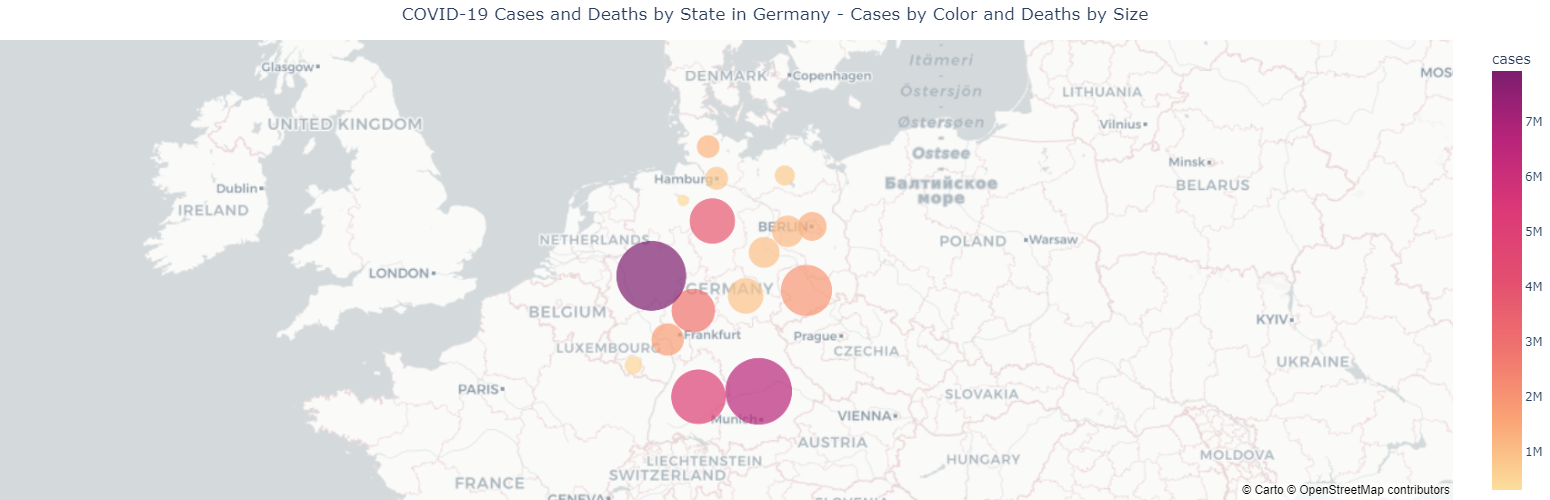

In [554]:
fig = px.scatter_mapbox(temp_df1,
                        lat="lat",
                        lon="lon",
                        size="deaths",        
                        color="cases",        
                        color_continuous_scale="SunsetDark",  
                        size_max=50,          
                        zoom=4.3,
                        height = 500,
                        ##width = 1000,
                        mapbox_style="carto-positron",  
                        hover_name="state",    
                        hover_data={'cases': True, 'deaths': True} 
                    )

# Adjust layout for better visibility
fig.update_layout(
    title="COVID-19 Cases and Deaths by State in Germany - Cases by Color and Deaths by Size",
    title_x=0.5, 
    geo=dict(
        center={"lat": 51.1657, "lon": 10.4515},  
    ),
    margin={"r":0, "t":40, "l":0, "b":0},  
)


fig.show()

### Cases and Deaths by County in a 

#### Merging with a new dataframe for coordinates

In [555]:
df5 = pd.read_csv('Downloads/Lat and lon_LS - Sheet1.csv')

In [556]:
df5.shape

(411, 7)

#### Cleaning the new dataframe to get the same name of county for the merging

In [557]:
df['county'] = df['county'].str.strip().str.lower()
df5['County'] = df5['County'].str.strip().str.lower()

# Converting the columns back to sets to compare 
counties_df1 = set(df['county'])
counties_df2 = set(df5['County'])

# Checking for missing counties 
missing_counties = counties_df1 - counties_df2

if not missing_counties:
    print("All counties from the first array are now present in the second array.")
else:
    print(f"The following counties are still missing: {missing_counties}")

All counties from the first array are now present in the second array.


#### Getting the final df for plotting

In [558]:
final_df = df.merge(df5, left_on='county', right_on='County', how='left')
final_df.head(2)

,state,county,age_group,gender,date,cases,deaths,recovered,Name,Type of division,Population,Land,Short name,Geo Point,County
0,Baden-Wuerttemberg,lk alb-donau-kreis,00-04,F,2020-03-27,1,0,1,Alb-Donau-Kreis,Landkreis,199732,Baden-Württemberg,LK Alb-Donau-Kreis,"48.401713286818065, 9.827430035679313",lk alb-donau-kreis
1,Baden-Wuerttemberg,lk alb-donau-kreis,00-04,F,2020-03-28,1,0,1,Alb-Donau-Kreis,Landkreis,199732,Baden-Württemberg,LK Alb-Donau-Kreis,"48.401713286818065, 9.827430035679313",lk alb-donau-kreis


#### Column Geopoint is added with latitude and longitude in a single column. Lets split the column to form separate lat and lon columns

In [559]:
final_df['lat'] = final_df['Geo Point'].str.split(',').str.get(0)
final_df['lon'] = final_df['Geo Point'].str.split(',').str.get(1)
final_df.head(2)

,state,county,age_group,gender,date,cases,deaths,recovered,Name,Type of division,Population,Land,Short name,Geo Point,County,lat,lon
0,Baden-Wuerttemberg,lk alb-donau-kreis,00-04,F,2020-03-27,1,0,1,Alb-Donau-Kreis,Landkreis,199732,Baden-Württemberg,LK Alb-Donau-Kreis,"48.401713286818065, 9.827430035679313",lk alb-donau-kreis,48.401713286818065,9.827430035679313
1,Baden-Wuerttemberg,lk alb-donau-kreis,00-04,F,2020-03-28,1,0,1,Alb-Donau-Kreis,Landkreis,199732,Baden-Württemberg,LK Alb-Donau-Kreis,"48.401713286818065, 9.827430035679313",lk alb-donau-kreis,48.401713286818065,9.827430035679313


In [560]:
df_ls = final_df.groupby(['county','lat','lon'])[['cases','deaths']].sum().reset_index()

#### Changing the datatype of Lat and Lon cols to float

In [561]:
df_ls['lat'] = df_ls['lat'].astype(float)
df_ls['lon'] = df_ls['lon'].astype(float)

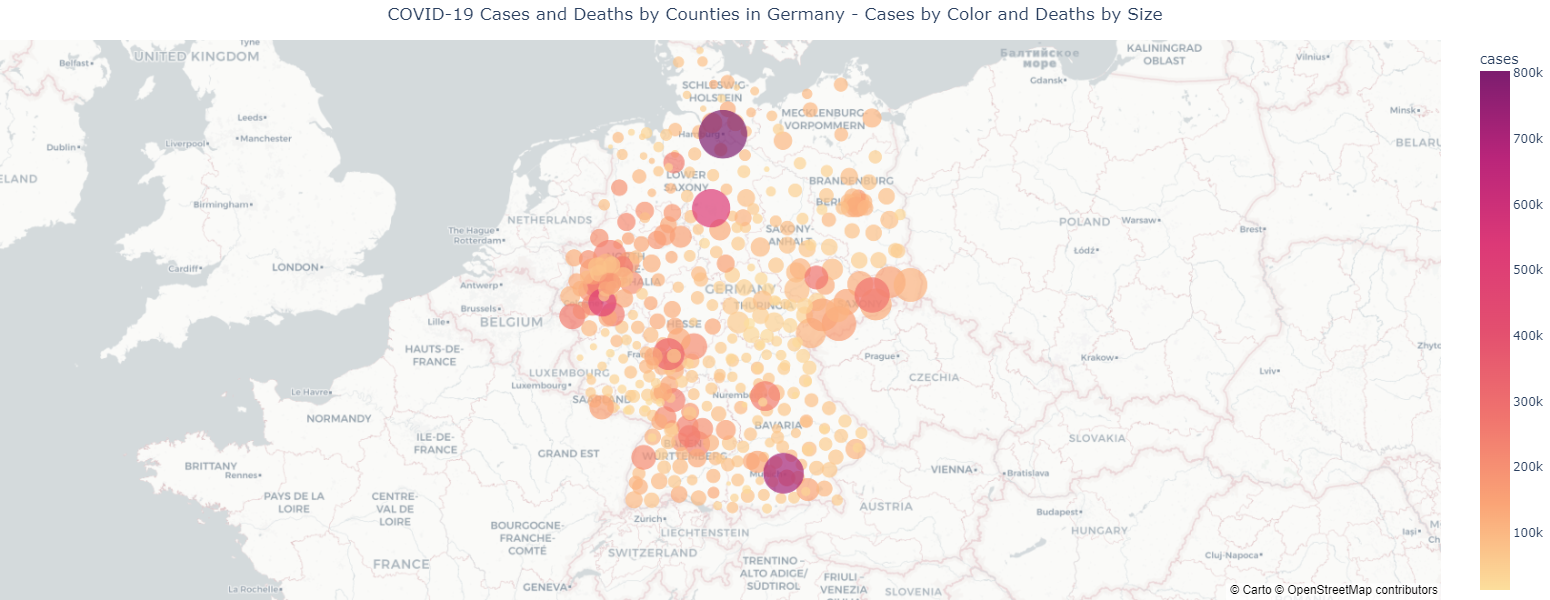

In [562]:
fig = px.scatter_mapbox(df_ls,
                        lat="lat",
                        lon="lon",
                        color="cases",
                        size = 'deaths',
                        color_continuous_scale='Sunsetdark', 
                        size_max=35,
                        height = 600,
                        zoom=4.8,                
                        mapbox_style="carto-positron",  
                        hover_name="county",    
                        hover_data={'cases': True, 'deaths': True}  
                    )

fig.update_layout(
    title="COVID-19 Cases and Deaths by Counties in Germany - Cases by Color and Deaths by Size",
    title_x=0.5, 
    geo=dict(
        center={"lat": 51.1657, "lon": 10.4515},    
    ),
    margin={"r":0, "t":40, "l":0, "b":0},  # Adjust margins for better layout
)

fig.show()

### Cases and deaths by Type of Division

In [563]:
df10 = final_df.groupby('Type of division')[['cases','deaths']].sum().reset_index()

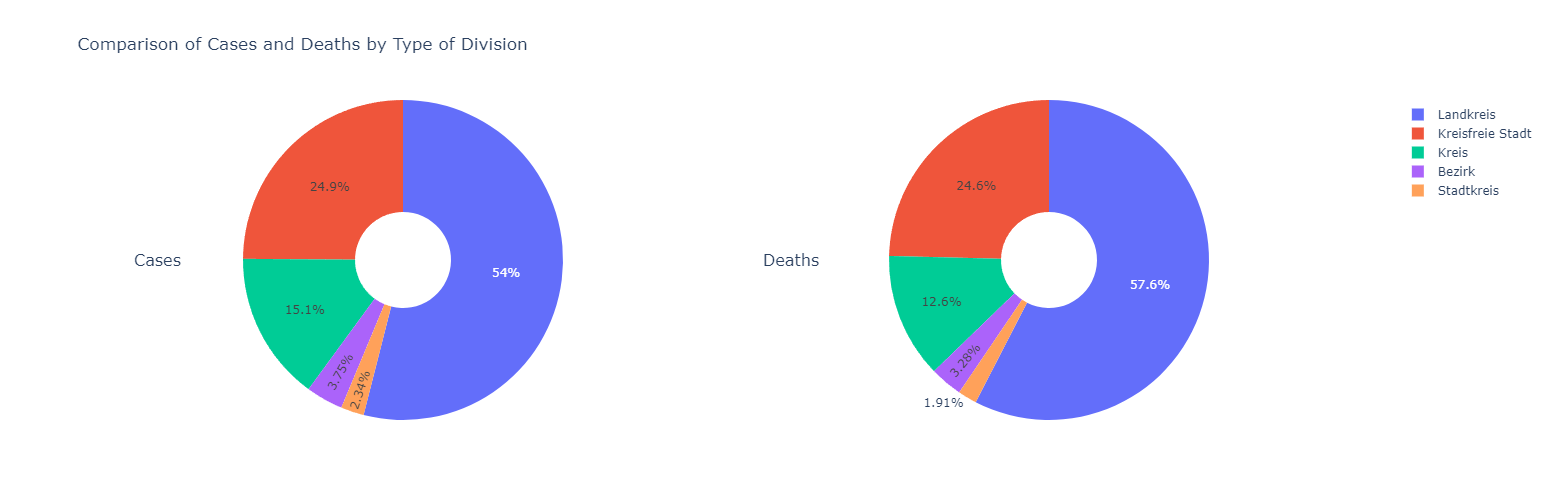

In [564]:
fig1 = px.pie(
    df10,
    names="Type of division",
    values="cases",
    title="Cases by Type of Division",
    hole=0.3,
)

fig2 = px.pie(
    df10,
    names="Type of division",
    values="deaths",
    title="Deaths by Type of Division",
    hole=0.3,
)

fig1.data[0].update(domain=dict(x=[0, 0.5])) 
fig2.data[0].update(domain=dict(x=[0.5, 1]))

fig1.add_traces(fig2.data)

fig1.update_layout(
    title_text="Comparison of Cases and Deaths by Type of Division",
    height = 500,
    width = 1300,
    annotations=[
        dict(text="Cases", x=0.04, y=0.5, showarrow=False, font_size=16),  
        dict(text="Deaths", x=0.55, y=0.5, showarrow=False, font_size=16),  
    ],
)

fig1.show()

#### Total cases and deaths by Gender

In [565]:
temp_df3 = final_df.groupby('gender')[['cases','deaths']].sum().reset_index()

filtered_df = temp_df3[temp_df3['gender'] != 0]

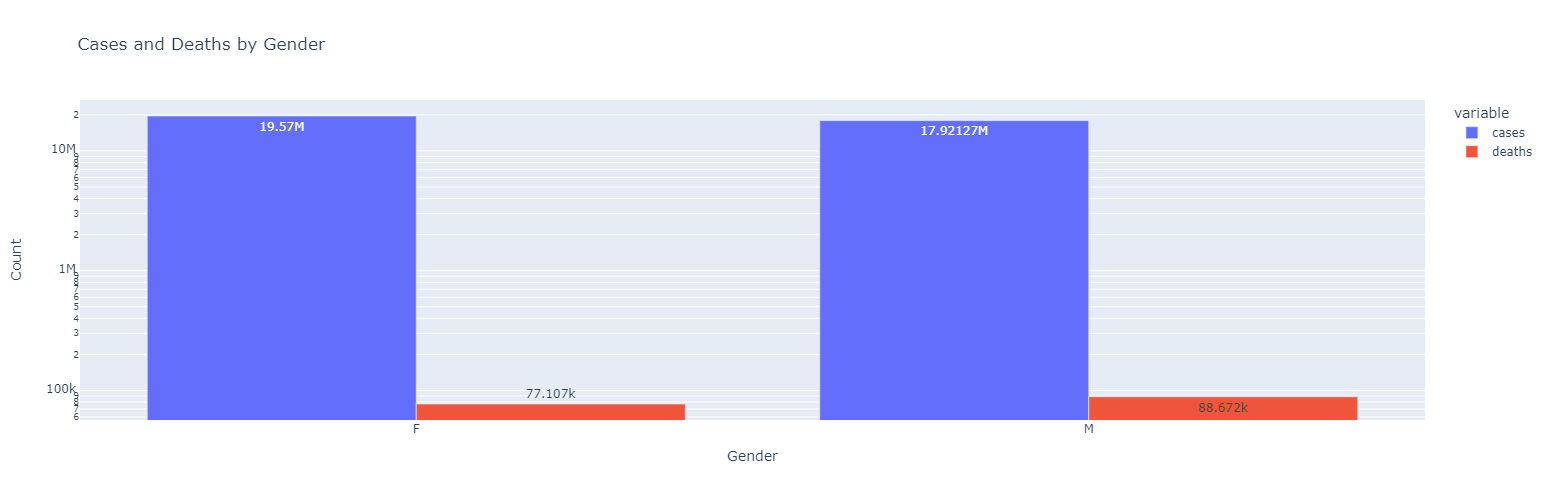

In [566]:
fig = px.bar(
    filtered_df,
    x='gender',         
    y=['cases', 'deaths'], 
    barmode='group',    
    title="Cases and Deaths by Gender",
    labels={'value': 'Count', 'gender': 'Gender'},  
    text_auto=True       
)
fig.update_layout(
    yaxis_type='log',  
    yaxis_title="Count",
    height = 500,
    width = 1000
)

# Show the figure
fig.show()

### Mortality rate by Gender

In [567]:
filtered_df['mortality_rate'] = filtered_df['deaths']/filtered_df['cases']*100


C:\Users\Asus\AppData\Local\Temp\ipykernel_18448\3291987625.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



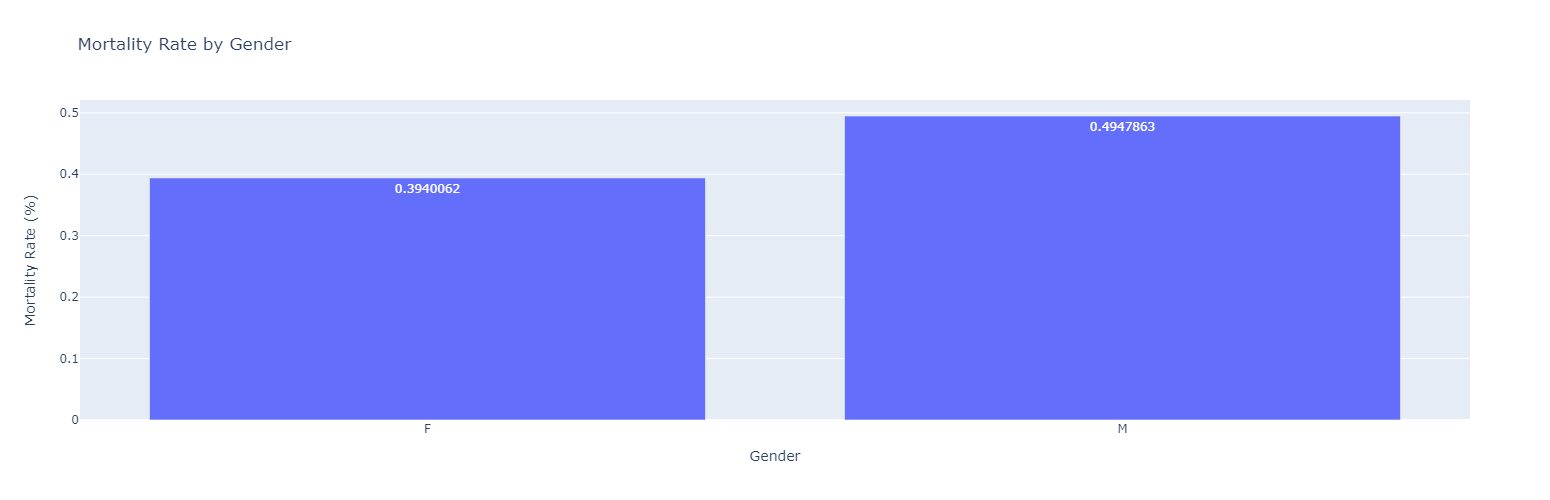

In [568]:
fig = px.bar(
    filtered_df,
    x='gender',
    y='mortality_rate',
    title="Mortality Rate by Gender",
    labels={'gender': 'Gender', 'mortality_rate': 'Mortality Rate (%)'},
    text_auto=True 
)

fig.update_layout(
    
    xaxis_title="Gender",          
    yaxis_title="Mortality Rate (%)",
    height = 500,
    width = 800
)

fig.show()

### Mortality Rate by Age-Group

In [569]:
temp_df5 = final_df.groupby('age_group')[['cases','deaths']].sum().reset_index()
temp_df5['mortality_rate'] = temp_df5['deaths']/temp_df5['cases']*100
temp_df6 = temp_df5[temp_df5['age_group'] != 0]

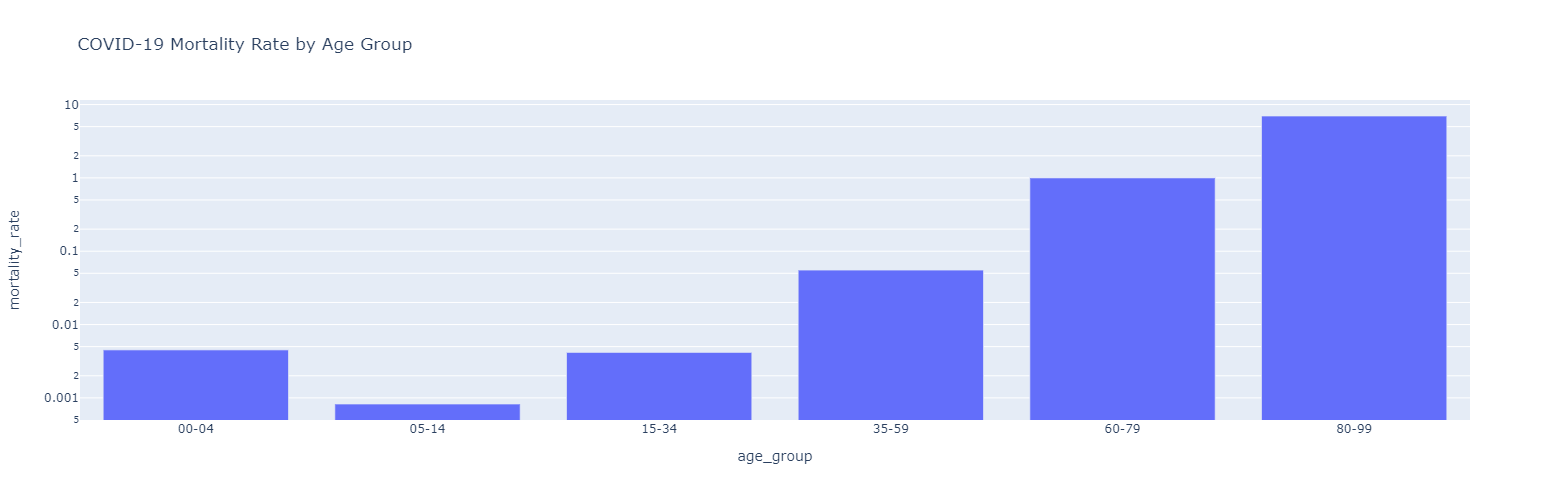

In [570]:
fig = px.bar(temp_df6,
             x='age_group',
             y='mortality_rate',
             title='COVID-19 Mortality Rate by Age Group',
             height = 500,
             width = 800,
            )
fig.update_xaxes(type='category')
fig.update_yaxes(type="log")
fig.show()

### Mortality rate by state 

In [571]:
cd['mortality_rate'] = cd['deaths']/cd['cases']*100

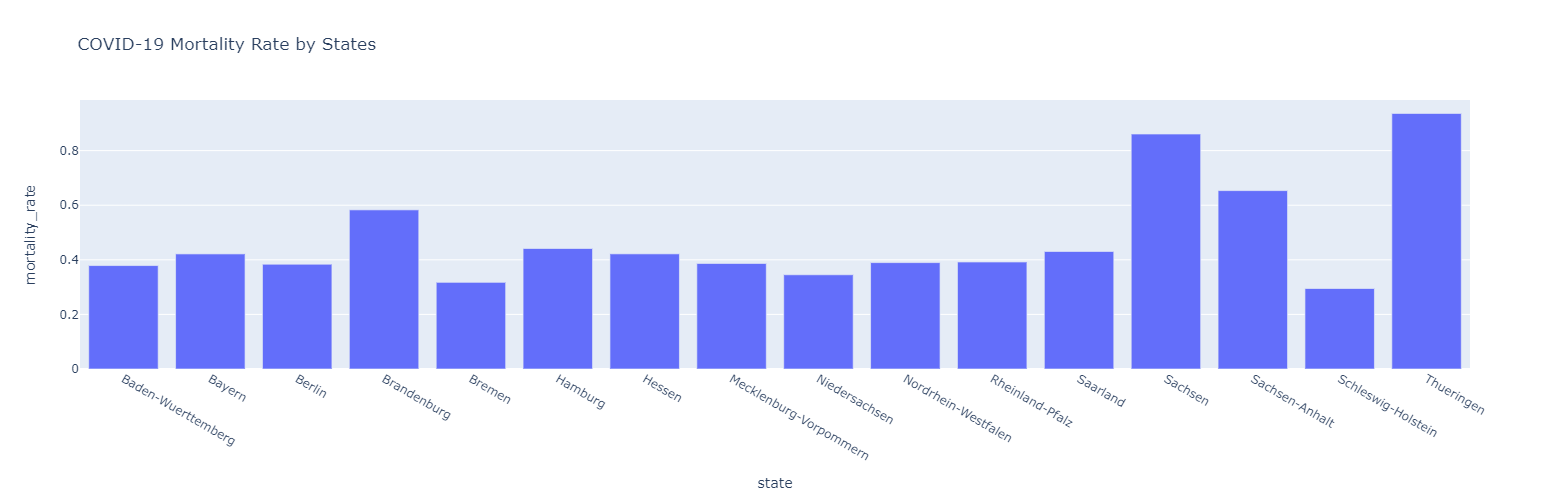

In [572]:
fig = px.bar(cd,
             x='state',
             y='mortality_rate',
             title='COVID-19 Mortality Rate by States',
             height = 500,
             width = 800,
            )
#fig.update_yaxes(type="log")
fig.show()

## Time Series Analysis

### Cases and Deaths by Month

In [573]:
final_df['month_name'] = final_df['date'].dt.strftime('%b')
final_df['year'] = final_df['date'].dt.year
final_df['week_number'] = final_df['date'].dt.week

C:\Users\Asus\AppData\Local\Temp\ipykernel_18448\3093182663.py:3: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.



In [574]:
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
final_df['month_name'] = pd.Categorical(final_df['month_name'], categories=month_order, ordered=True)
monthly_data = final_df.groupby(['year', 'month_name'])[['cases', 'deaths']].sum().sort_values(['year','month_name']).reset_index()
monthly_data =monthly_data.drop(index=final_df.index[38:48])

In [575]:
monthly_data['year'] = monthly_data['year'].astype(str)
monthly_data['month_name'] = monthly_data['month_name'].astype(str)

monthly_data['year_month'] = monthly_data['year'] + "-" + monthly_data['month_name']


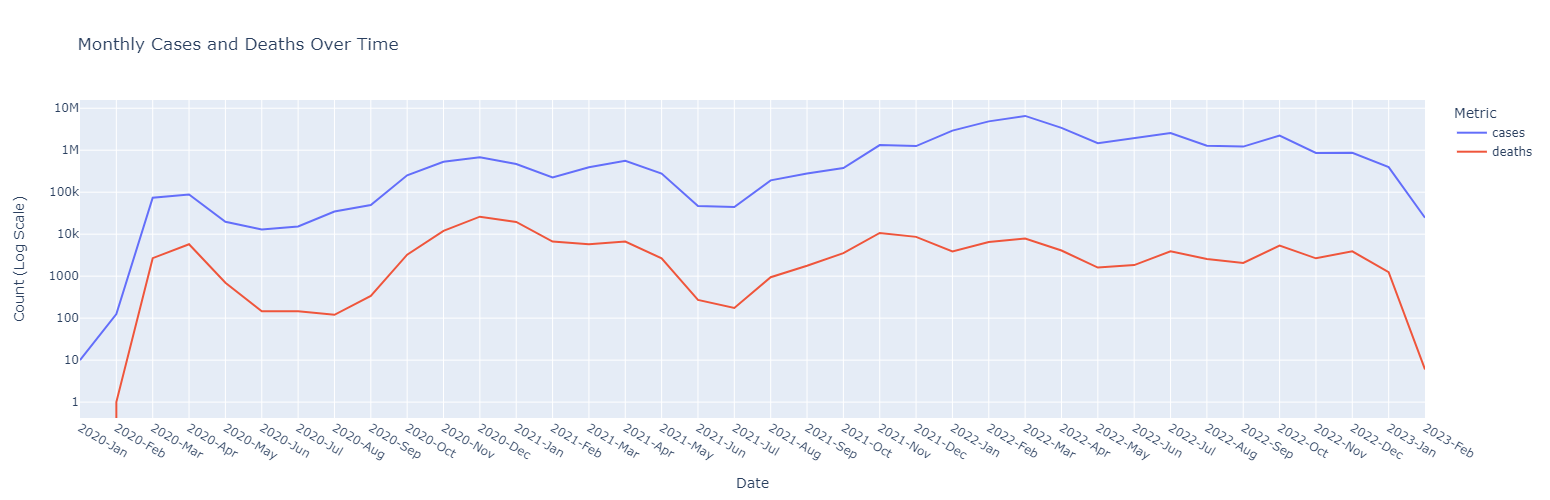

In [583]:
fig = px.line(
    monthly_data,
    x='year_month',
    y=['cases', 'deaths'],
    labels={
        "value": "Count",      # Label for y-axis
        "year_month": "Time",  # Label for x-axis
        "variable": "Metric"   # Label for the color legend
    },
    height = 500,
    title="Monthly Cases and Deaths Over Time"
)

# Customize the x-axis to display all months chronologically
fig.update_xaxes(
    tickformat="%b %Y",           # Format to show abbreviated month and year
    title="Date"
)

# Set y-axis to logarithmic scale if desired
fig.update_yaxes(type="log", title="Count (Log Scale)")

# Show the plot
fig.show()

### Cases and Deaths on Daily basis with Holidays Highlighted

In [584]:
daily_data = final_df.groupby('date')[['cases','deaths']].sum().reset_index()

#### Inserting the holidays list

In [585]:
import holidays

In [586]:
years = list(range(2020, 2024))

german_holidays = holidays.Germany(years=years)

holidays_df = pd.DataFrame(list(german_holidays.items()), columns=['Date', 'Holiday'])
holidays_df['Date'] = pd.to_datetime(holidays_df['Date'])

daily_data['is_holiday'] = daily_data['date'].isin(holidays_df['Date'])


In [587]:
holiday_points = daily_data[daily_data['is_holiday']]

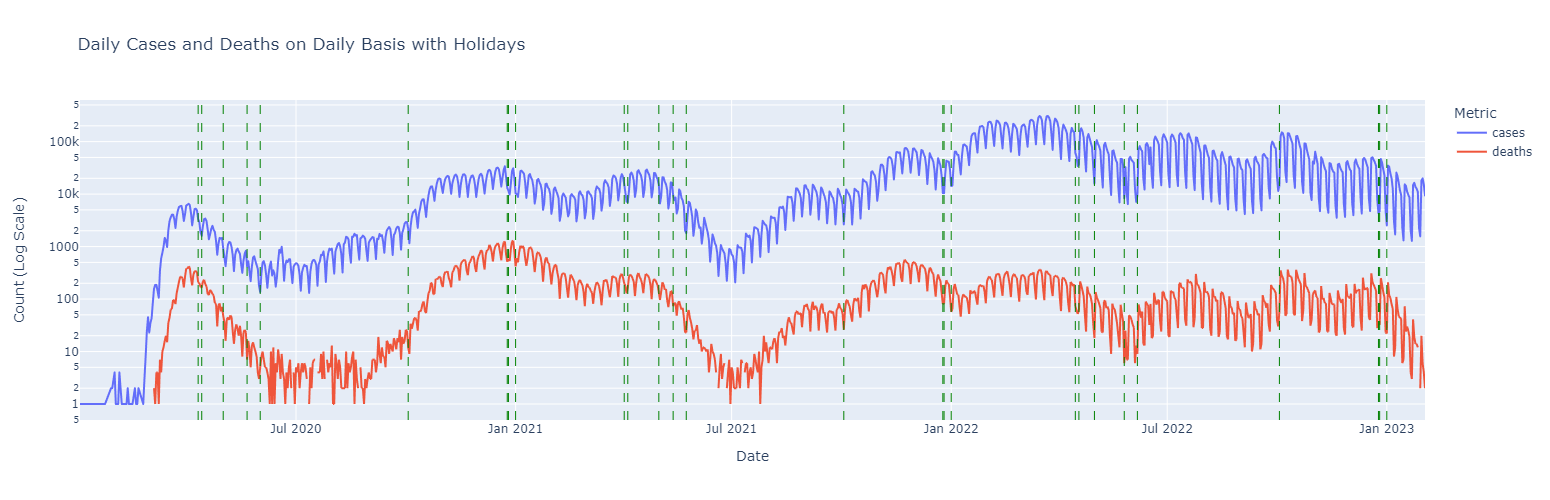

In [595]:
fig = px.line(
    daily_data,
    x='date',
    y=['cases', 'deaths'],
    labels={
        "value": "Count",     
        "daily": "Time",  
        "variable": "Metric"   
    }, height =500,
    title="Daily Cases and Deaths on Daily Basis with Holidays"
)
for holiday_date in daily_data[daily_data['is_holiday']]['date']:
    fig.add_vline(x=holiday_date, line_width=1, line_dash="dash", line_color="green")

fig.update_xaxes(
    tickformat="%b %Y",          
    title="Date"
)

fig.update_yaxes(type="log", title="Count (Log Scale)")

# Show the plot
fig.show()

### Cases and Deaths on Weekly basis

In [589]:
weekly_data = final_df.groupby(['year','week_number'])[['cases','deaths']].sum().reset_index()

In [590]:
weekly_data['year'] = weekly_data['year'].astype(str)
weekly_data['week_number'] = weekly_data['week_number'].astype(str)
weekly_data['week_year'] = 'W' + weekly_data['week_number'] + "-" + weekly_data['year']

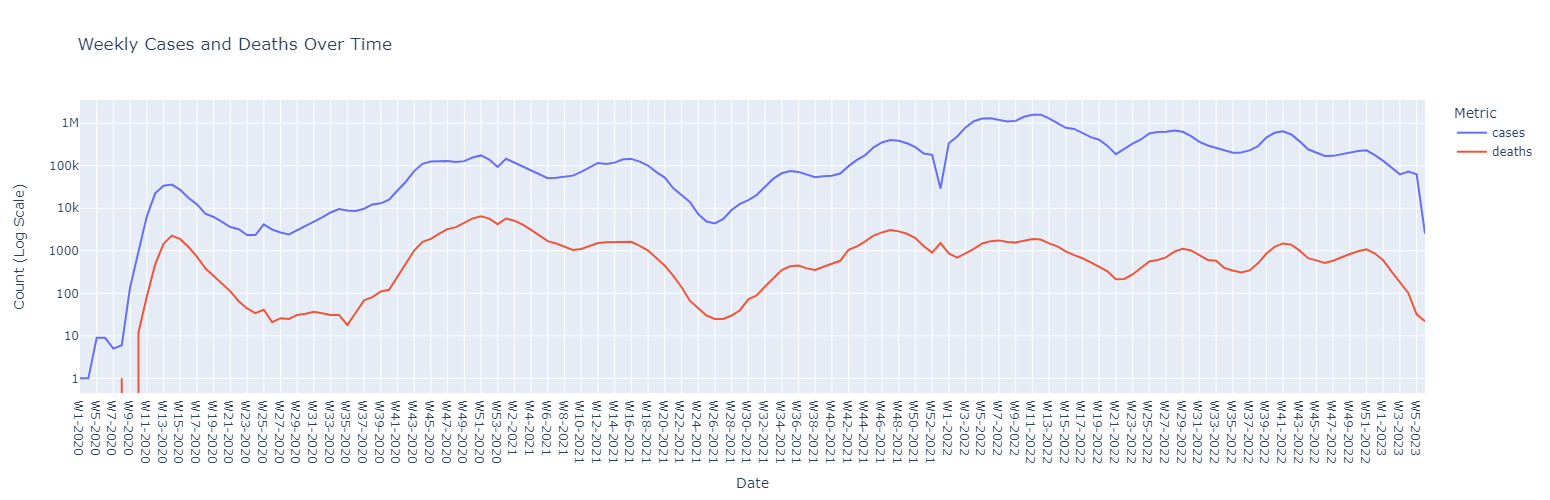

In [591]:
fig = px.line(
    weekly_data,
    x='week_year',
    y=['cases', 'deaths'],
    labels={
        "value": "Count",      # Label for y-axis
        "daily": "Time",  # Label for x-axis
        "variable": "Metric"   # Label for the color legend
    },
    height = 500,
    title="Weekly Cases and Deaths Over Time"
)

# Customize the x-axis to display all months chronologically
fig.update_xaxes(
    tickformat="%b %Y",           # Format to show abbreviated month and year
    title="Date"
)

# Set y-axis to logarithmic scale if desired
fig.update_yaxes(type="log", title="Count (Log Scale)")

# Show the plot

### Cumulative Sum of Cases and Deaths by Month

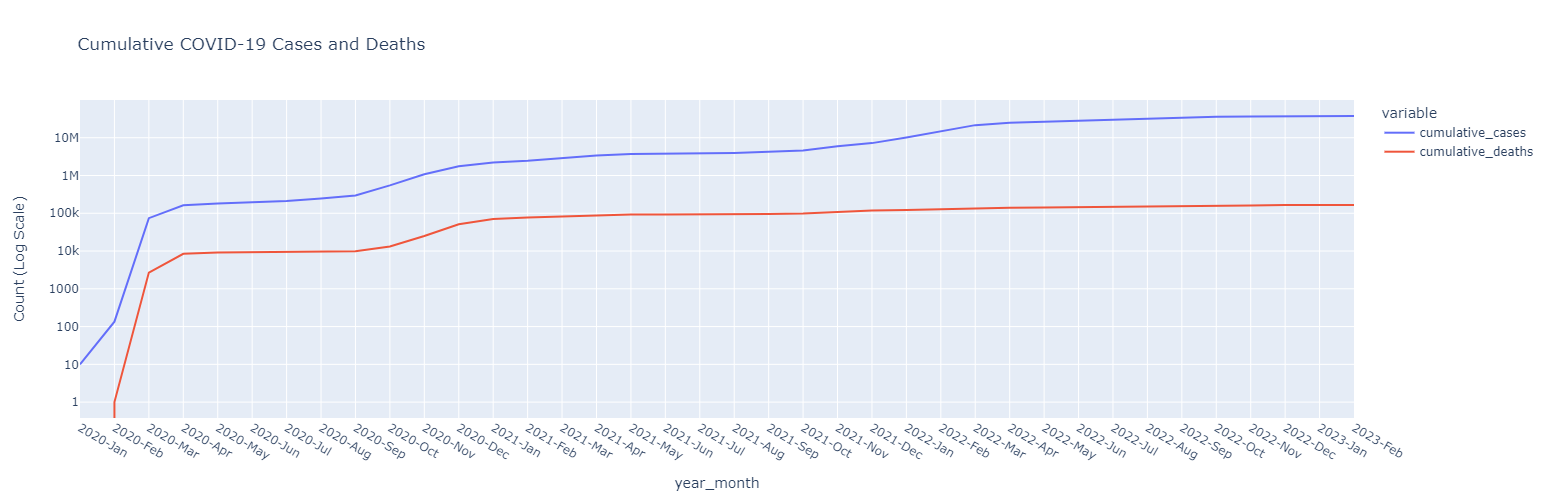

In [592]:
monthly_data['cumulative_cases'] = monthly_data['cases'].cumsum()
monthly_data['cumulative_deaths'] = monthly_data['deaths'].cumsum()

fig = px.line(
    monthly_data,
    x='year_month',
    y=['cumulative_cases', 'cumulative_deaths'],
    title="Cumulative COVID-19 Cases and Deaths",
    height = 500,
    labels={'value': 'Cumulative Count', 'date': 'Date'},
)
fig.update_yaxes(type="log", title="Count (Log Scale)")
fig.show()

### Mortality Rate by Month

In [601]:
monthly_data['mor'] = monthly_data['deaths']/monthly_data['cases']*100

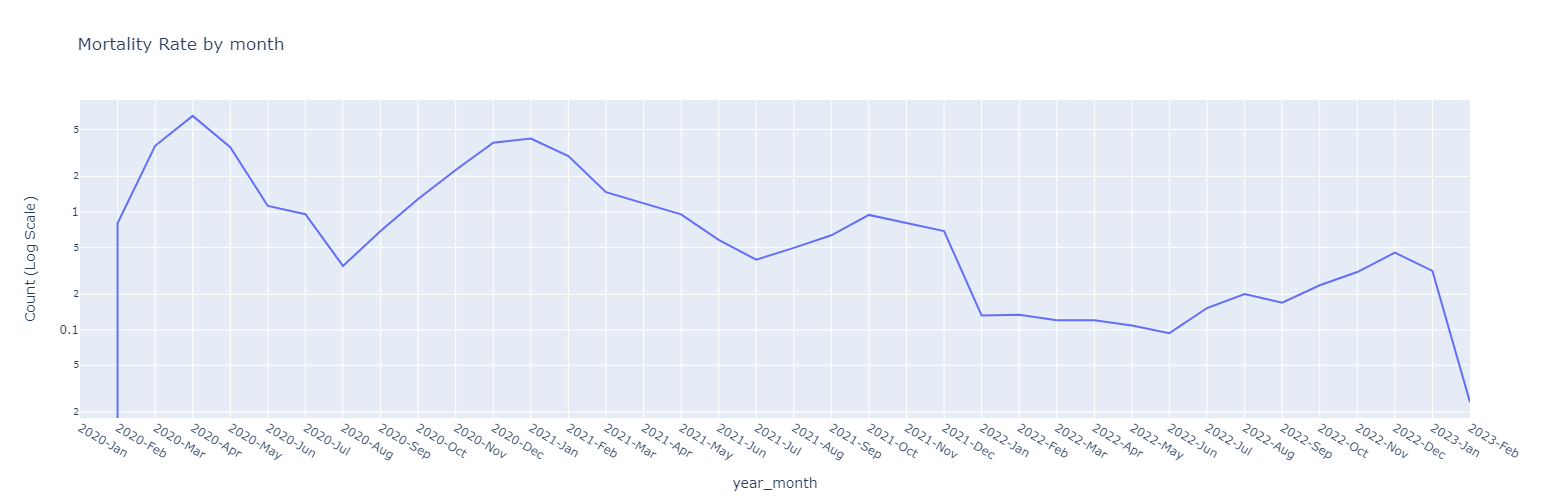

In [604]:
fig = px.line(
    monthly_data,
    x='year_month',
    y='mor',
    title='Mortality Rate by month',
    height = 500,
    labels={'value': 'Count', 'date': 'Date'},
)
fig.update_yaxes(type="log", title="Count (Log Scale)")
fig.show()